# Regressão Linear Simples

**Perguna de Negócio:** 
O salário de acordo com os anos de educação superior? Se sim, é possível construir um modelo que estime o salário de acordo com esses anos? 

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns 

# pacotes de Modelagem Estatística
import statsmodels.api as sm

# Importação da base de dados

In [12]:
df = pd.read_csv('base1.csv',
                 sep=';',
                 index_col='id')

In [13]:
df.shape

(46, 2)

In [24]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
dtype: object

In [19]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [20]:
df = pd.read_csv('base2.csv',
           sep=';',
           index_col='id')

In [21]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [22]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
dtype: object

In [37]:
df = pd.read_csv('base3.csv',
                 sep=',',
                 index_col='id')

In [38]:
df.shape

(46, 4)

In [27]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
id,,,,
0,5517.4,3,3,9.777079
1,6399.9,4,6,3.765998
2,6206.7,6,3,7.926264
3,6060.6,4,5,2.233497
4,6122.7,2,9,26.821842


In [39]:
df.tail()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
id,,,,
41,5499.4,5,7,16.338779
42,8521.6,8,6,17.720932
43,5170.9,1,5,4.570466
44,6235.4,4,6,6.578993
45,11460.2,12,27,67.858714


In [29]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
Tempo_de_Carreira     float64
dtype: object

# Análise Exploratória dos Dados

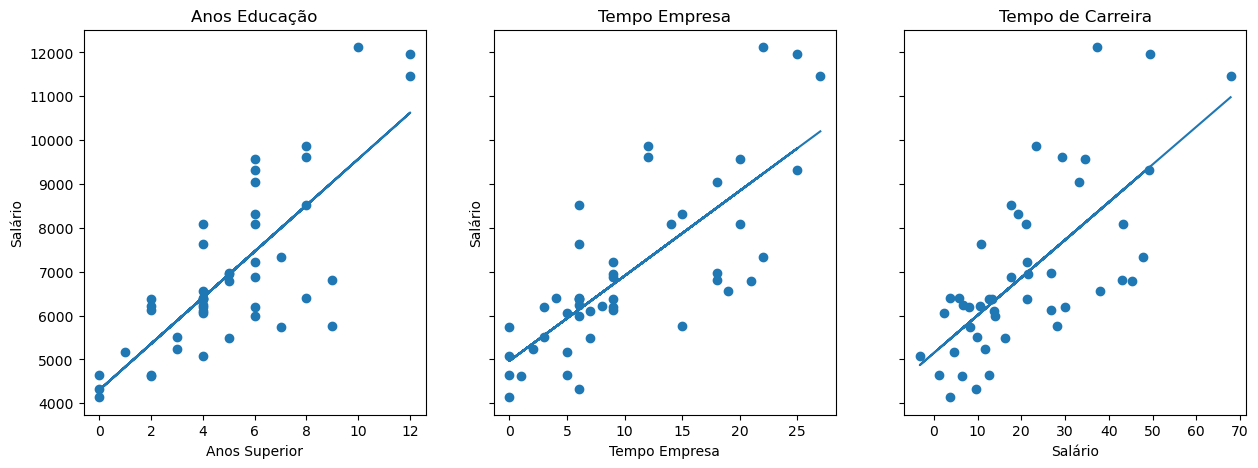

In [45]:
# Gráfico de Dispersão
fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,5)) # uma forma de usar os dois gráficos
ax1.set_title('Anos Educação')
ax2.set_title('Tempo Empresa')
ax3.set_title('Tempo de Carreira')

ax1.set_xlabel('Anos Superior')
ax1.set_ylabel('Salário')

ax2.set_xlabel('Tempo Empresa')
ax2.set_ylabel('Salário')

ax3.set_xlabel('Tempo de Carreira')
ax3.set_xlabel('Salário')

ax1.scatter(df['Anos_Educ_Superior'], df['Salario'])
m, b = np.polyfit(df['Anos_Educ_Superior'], df['Salario'], 1)
ax1.plot(df['Anos_Educ_Superior'],m * df['Anos_Educ_Superior'] + b)

ax2.scatter(df['Tempo_Empresa'], df['Salario'])
m, b = np.polyfit(df['Tempo_Empresa'], df['Salario'], 1)
ax2.plot(df['Tempo_Empresa'],m * df['Tempo_Empresa'] + b)

ax3.scatter(df['Tempo_de_Carreira'], df['Salario'])
m, b = np.polyfit(df['Tempo_de_Carreira'], df['Salario'],1)
ax3.plot(df['Tempo_de_Carreira'],m*df['Tempo_de_Carreira']+ b)



<Axes: >

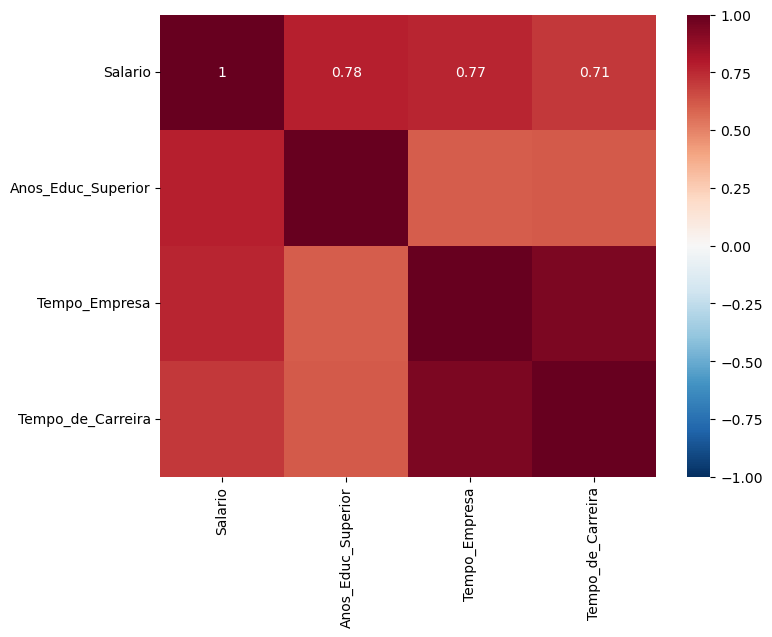

In [46]:
# Correlação Linear de Pearson
fig = plt.figure(figsize=(8,6))
sns.heatmap(
            df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True
           )

## Ajuste do Modelo de Regressão Statsmodels

In [50]:
# Variável Resposta
y = df['Salario'] #váriável resposta

# Variável Explicativa
df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa', 'Tempo_de_Carreira']] #váriavel explicativa

In [51]:
# Ajuste do nosso modelo
modelo = sm.OLS(y,x)
resultado = modelo.fit()

In [52]:
# Resultado do ajuste
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           1.21e-12
Time:                        16:38:51   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4053.7618    308